# 6.2 Exploring relationships

### This script contains the following:

#### 1. Importing Visualization Libraries and Data
#### 2. Data Cleaning
#### 3. Exploring Relationships
     Correlations
     Scatterplots
     Pair Plots
     Categorical Plots
#### 4. Responses 7 and 8

### 1. Importing Visualization Libraries and Data

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import os

In [3]:
# This option ensures the charts you create are displayed in the notebook without the need to "call" them specifically.

%matplotlib inline

In [4]:
# Create Path to create folder into a string
path = r'C:\Users\E054746\OneDrive - RSM\Data Analytics\CareerFoundry\Data Immersion\Achievement 6\US Regional Sales Analysis'

In [5]:
# Import US Regional Sales Data (scrubbed version)
df = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'us_regional_sales_clean_020222.pkl'))

### 2. Data Cleaning

#### Renaming Columns:

In [40]:
df.shape

(7991, 37)

In [41]:
df.columns

Index(['Order_Number', 'Sales_Channel', 'Warehouse_Code', 'Procured_Date',
       'Order_Date', 'Months_In_Stock', 'Ship_Date', 'Days_To_Process_Order',
       'Delivery_Date', 'Days_In_Transit', 'SalesTeam_ID', 'Customer_ID',
       'Store_ID', 'Product_ID', 'Order_Quantity', 'Discount_Applied',
       'Unit_Price', 'Unit_Cost', 'Discounted_Price_PU', 'Total_Sale',
       'Total Cost', 'Total Profit', 'Customer_Names', 'Product_Name',
       'City_Name', 'County', 'State_Code', 'State', 'Type', 'Latitude',
       'Longitude', 'Population', 'Household_Income', 'Median_Income',
       'Time_Zone', 'Region', 'Sales_Team'],
      dtype='object')

In [42]:
df.dtypes

Order_Number                     object
Sales_Channel                    object
Warehouse_Code                   object
Procured_Date            datetime64[ns]
Order_Date               datetime64[ns]
Months_In_Stock                   int64
Ship_Date                datetime64[ns]
Days_To_Process_Order             int64
Delivery_Date            datetime64[ns]
Days_In_Transit                   int64
SalesTeam_ID                      int64
Customer_ID                       int64
Store_ID                          int64
Product_ID                        int64
Order_Quantity                    int64
Discount_Applied                float64
Unit_Price                      float64
Unit_Cost                       float64
Discounted_Price_PU             float64
Total_Sale                      float64
Total Cost                      float64
Total Profit                    float64
Customer_Names                   object
Product_Name                     object
City_Name                        object


In [43]:
# Change options to display all columns
pd.options.display.max_columns = None

In [44]:
df.head()

,Order_Number,Sales_Channel,Warehouse_Code,Procured_Date,Order_Date,Months_In_Stock,Ship_Date,Days_To_Process_Order,Delivery_Date,Days_In_Transit,SalesTeam_ID,Customer_ID,Store_ID,Product_ID,Order_Quantity,Discount_Applied,Unit_Price,Unit_Cost,Discounted_Price_PU,Total_Sale,Total Cost,Total Profit,Customer_Names,Product_Name,City_Name,County,State_Code,State,Type,Latitude,Longitude,Population,Household_Income,Median_Income,Time_Zone,Region,Sales_Team
0,SO - 000101,In-Store,WARE-UHY1004,2017-12-31,2018-05-31,5,2018-06-14,14,2018-06-19,5,6,15,259,12,5,0.075,1963.1,1001.181,1815.8675,9079.3375,5005.905,4073.4325,Rochester Ltd,Dining Furniture,Babylon (Town),Suffolk County,NY,New York,Town,40.64092,-73.31669,213776,68789,80327,America/New York,Northeast,Joshua Bennett
1,SO - 0005035,In-Store,WARE-UHY1004,2019-08-23,2020-01-08,4,2020-01-15,7,2020-01-21,6,6,47,259,1,3,0.150,1755.4,1298.996,1492.0900,4476.2700,3896.988,579.2820,Niconovum Corp,Cookware,Babylon (Town),Suffolk County,NY,New York,Town,40.64092,-73.31669,213776,68789,80327,America/New York,Northeast,Joshua Bennett
2,SO - 0006409,In-Store,WARE-UHY1004,2020-03-10,2020-06-17,3,2020-07-03,16,2020-07-12,9,6,41,259,16,5,0.075,3544.3,2020.251,3278.4775,16392.3875,10101.255,6291.1325,Weimei Corp,Stemware,Babylon (Town),Suffolk County,NY,New York,Town,40.64092,-73.31669,213776,68789,80327,America/New York,Northeast,Joshua Bennett
3,SO - 0006713,In-Store,WARE-UHY1004,2020-03-10,2020-07-21,4,2020-08-15,25,2020-08-16,1,6,48,259,6,3,0.075,2492.4,1246.200,2305.4700,6916.4100,3738.600,3177.8100,"Fenwal, Corp",Computers,Babylon (Town),Suffolk County,NY,New York,Town,40.64092,-73.31669,213776,68789,80327,America/New York,Northeast,Joshua Bennett
4,SO - 0007028,In-Store,WARE-NMK1003,2020-06-18,2020-08-29,2,2020-09-11,13,2020-09-14,3,6,44,112,14,3,0.200,3993.2,3034.832,3194.5600,9583.6800,9104.496,479.1840,Winthrop,Mirrors,Waterbury (Town),New Haven County,CT,Connecticut,Town,41.55850,-73.03668,108802,40213,40467,America/New York,Northeast,Joshua Bennett


### Create a subset dataframe to exlude  unnecessary columns

In [45]:
# Create a subset excluding the "Date", "Order_Number","SalesTeam_ID","Customer_ID","Store_ID","Product_ID", "Procured_Date","Order_Date,"Ship_Date","Delivery_Date","State Code",Latitude","Longitude","Time Zone"

sub = df[['Sales_Channel','County','Order_Quantity','Months_In_Stock','Days_To_Process_Order','Days_In_Transit','SalesTeam_ID','Store_ID','Product_ID','Customer_Names','Product_Name','City_Name','State','Type','Population','Household_Income','Region','Sales_Team','Total_Sale','Total Cost','Total Profit']]

In [46]:
sub

,Sales_Channel,County,Order_Quantity,Months_In_Stock,Days_To_Process_Order,Days_In_Transit,SalesTeam_ID,Store_ID,Product_ID,Customer_Names,Product_Name,City_Name,State,Type,Population,Household_Income,Region,Sales_Team,Total_Sale,Total Cost,Total Profit
0,In-Store,Suffolk County,5,5,14,5,6,259,12,Rochester Ltd,Dining Furniture,Babylon (Town),New York,Town,213776,68789,Northeast,Joshua Bennett,9079.3375,5005.905,4073.4325
1,In-Store,Suffolk County,3,4,7,6,6,259,1,Niconovum Corp,Cookware,Babylon (Town),New York,Town,213776,68789,Northeast,Joshua Bennett,4476.2700,3896.988,579.2820
2,In-Store,Suffolk County,5,3,16,9,6,259,16,Weimei Corp,Stemware,Babylon (Town),New York,Town,213776,68789,Northeast,Joshua Bennett,16392.3875,10101.255,6291.1325
3,In-Store,Suffolk County,3,4,25,1,6,259,6,"Fenwal, Corp",Computers,Babylon (Town),New York,Town,213776,68789,Northeast,Joshua Bennett,6916.4100,3738.600,3177.8100
4,In-Store,New Haven County,3,2,13,3,6,112,14,Winthrop,Mirrors,Waterbury (Town),Connecticut,Town,108802,40213,Northeast,Joshua Bennett,9583.6800,9104.496,479.1840
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7986,In-Store,Brown County,1,1,27,10,5,365,44,Medline,Pillows,Green Bay,Wisconsin,City,105207,42308,Midwest,Stephen Payne,3634.4150,2333.677,1300.7380
7987,In-Store,East Baton Rouge Parish,6,5,6,7,5,201,10,Winthrop,Blankets,Baton Rouge,Louisiana,City,228590,88476,South,Stephen Payne,3738.6000,4860.180,-1121.5800
7988,In-Store,East Baton Rouge Parish,8,4,14,8,5,201,32,Victory Ltd,Vases,Baton Rouge,Louisiana,City,228590,88476,South,Stephen Payne,24484.4800,18363.360,6121.1200
7989,In-Store,Clark County,3,3,23,5,5,252,30,Ei,Wall Coverings,Las Vegas,Nevada,City,623747,215614,West,Stephen Payne,4212.9600,3896.988,315.9720


#### Missing Values Check:

In [47]:
# Check for missing values

df.isnull().sum() # No missing values.

Order_Number             0
Sales_Channel            0
Warehouse_Code           0
Procured_Date            0
Order_Date               0
Months_In_Stock          0
Ship_Date                0
Days_To_Process_Order    0
Delivery_Date            0
Days_In_Transit          0
SalesTeam_ID             0
Customer_ID              0
Store_ID                 0
Product_ID               0
Order_Quantity           0
Discount_Applied         0
Unit_Price               0
Unit_Cost                0
Discounted_Price_PU      0
Total_Sale               0
Total Cost               0
Total Profit             0
Customer_Names           0
Product_Name             0
City_Name                0
County                   0
State_Code               0
State                    0
Type                     0
Latitude                 0
Longitude                0
Population               0
Household_Income         0
Median_Income            0
Time_Zone                0
Region                   0
Sales_Team               0
d

#### Duplicates Check:

In [48]:
# Find duplicates

df_dups = df[df.duplicated()]

In [49]:
df_dups.shape # No duplicatess.

(0, 37)

#### Mixed-Type Data:

In [50]:
for col in df.columns.tolist():
      weird = (df[[col]].applymap(type) != df[[col]].iloc[0].apply(type)).any(axis = 1)
      if len (df[weird]) > 0:
        print (col)
        
# No mixed-type columns either.

### 3. Exploring Relationships

### Correlations:

In [51]:
# Create a correlation matrix using pandas

sub.corr()

,Order_Quantity,Months_In_Stock,Days_To_Process_Order,Days_In_Transit,SalesTeam_ID,Store_ID,Product_ID,Population,Household_Income,Total_Sale,Total Cost,Total Profit
Order_Quantity,1.000000,-0.007060,-0.007098,0.001392,0.009241,-0.001096,0.006514,-0.030292,-0.029884,0.523132,0.502995,0.400702
Months_In_Stock,-0.007060,1.000000,-0.005772,0.001544,-0.014475,-0.006405,-0.005878,0.004646,0.004503,0.005666,0.010114,-0.004614
Days_To_Process_Order,-0.007098,-0.005772,1.000000,-0.001970,0.007014,-0.004682,-0.007569,-0.000412,-0.001061,-0.005438,-0.008787,0.002663
Days_In_Transit,0.001392,0.001544,-0.001970,1.000000,0.015428,-0.004798,0.004786,0.023680,0.022459,0.002004,0.000379,0.004504
SalesTeam_ID,0.009241,-0.014475,0.007014,0.015428,1.000000,-0.014791,0.001269,-0.005547,-0.004923,0.008147,0.004377,0.012872
Store_ID,-0.001096,-0.006405,-0.004682,-0.004798,-0.014791,1.000000,-0.005283,0.070173,0.085786,0.006998,0.003329,0.011884
Product_ID,0.006514,-0.005878,-0.007569,0.004786,0.001269,-0.005283,1.000000,-0.013484,-0.013962,-0.008382,-0.001728,-0.018571
Population,-0.030292,0.004646,-0.000412,0.023680,-0.005547,0.070173,-0.013484,1.000000,0.992957,-0.010173,-0.009363,-0.008596
Household_Income,-0.029884,0.004503,-0.001061,0.022459,-0.004923,0.085786,-0.013962,0.992957,1.000000,-0.010116,-0.009340,-0.008490
Total_Sale,0.523132,0.005666,-0.005438,0.002004,0.008147,0.006998,-0.008382,-0.010173,-0.010116,1.000000,0.948009,0.791869


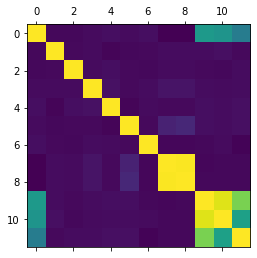

In [52]:
# Create a correlation heatmap using matplotlib

plt.matshow(sub.corr())
plt.show()

Text(0.5, 1.0, 'Correlation Matrix')

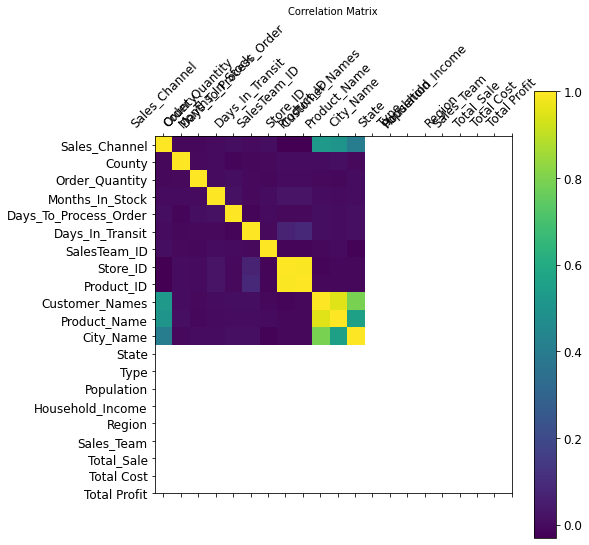

In [53]:
# Add labels, a legend, and change the size of the heatmap

f = plt.figure(figsize=(8, 8)) # figure size 
plt.matshow(sub.corr(), fignum=f.number) # type of plot
plt.xticks(range(sub.shape[1]), sub.columns, fontsize=12, rotation=45) # x axis labels
plt.yticks(range(sub.shape[1]), sub.columns, fontsize=12) # y axis labels
cb = plt.colorbar() # add a colour legend (called colorbar)
cb.ax.tick_params(labelsize=12) # add font size
plt.title('Correlation Matrix', fontsize=10) # add title

Seems like the plot above is not legible and thereforem, seaborn, might be a better approach

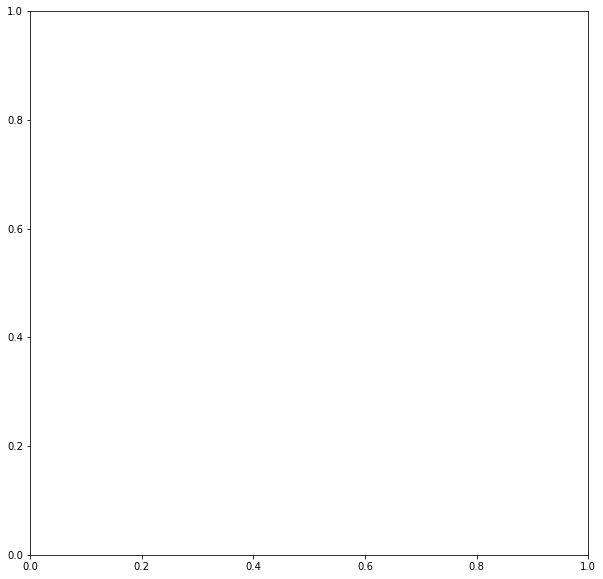

In [54]:
# Create a subplot with matplotlib. just to show the subplots.

f,ax = plt.subplots(figsize=(10,10))

In [55]:
# Create the correlation heatmap in seaborn by applying a heatmap onto the correlation matrix and the subplots defined above.

corr = sns.heatmap(sub.corr(), annot = True, ax = ax)

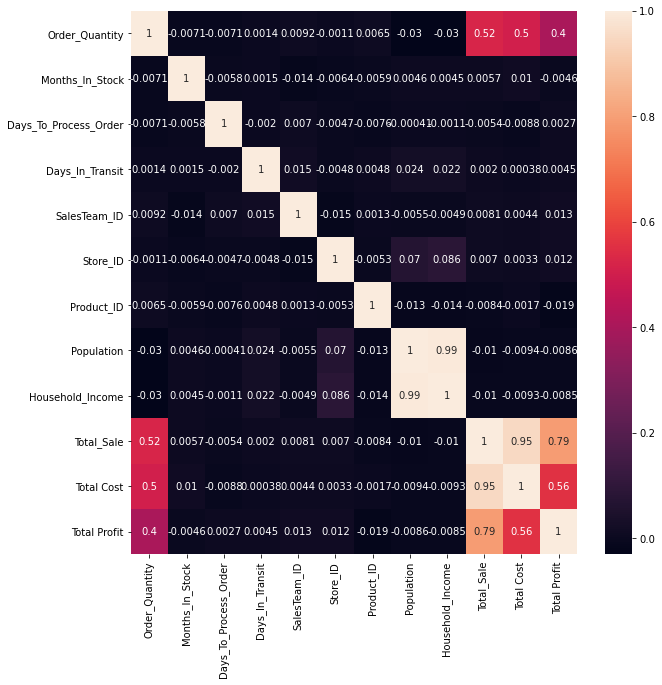

In [56]:
corr.figure

#### correlation observations:
   - With "Household Income": A 0.99 coefficient indicates a strong positive correlation, which means that higher the population the higher the household income - makes sense.  
   - With "Unit Price": a coefficient of 0.94 indicates a strong positive correlation. Can be interpreted as the higher the cost to make a product, the higher the price it will be. Again, makes sense as a company needs to make a margin. 


In [53]:
# Create a subset excluding the "Date", "Order_Number","SalesTeam_ID","Customer_ID","Store_ID","Product_ID", "Procured_Date","Order_Date,"Ship_Date","Delivery_Date","State Code",Latitude","Longitude","Time Zone"

sub2 = df[['Sales_Channel','Order_Quantity','Months_In_Stock','Days_To_Process_Order','Days_In_Transit','Population','Household_Income','Total_Sale','Total Cost','Total Profit']]

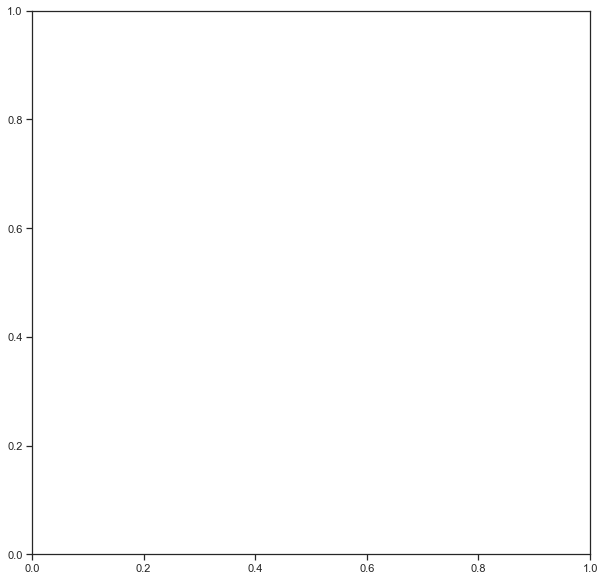

In [55]:
# Create a subplot with matplotlib. just to show the subplots.

g,ax = plt.subplots(figsize=(10,10))

In [56]:
# Create the correlation heatmap in seaborn by applying a heatmap onto the correlation matrix and the subplots defined above.

corr2 = sns.heatmap(sub2.corr(), annot = True, ax = ax)

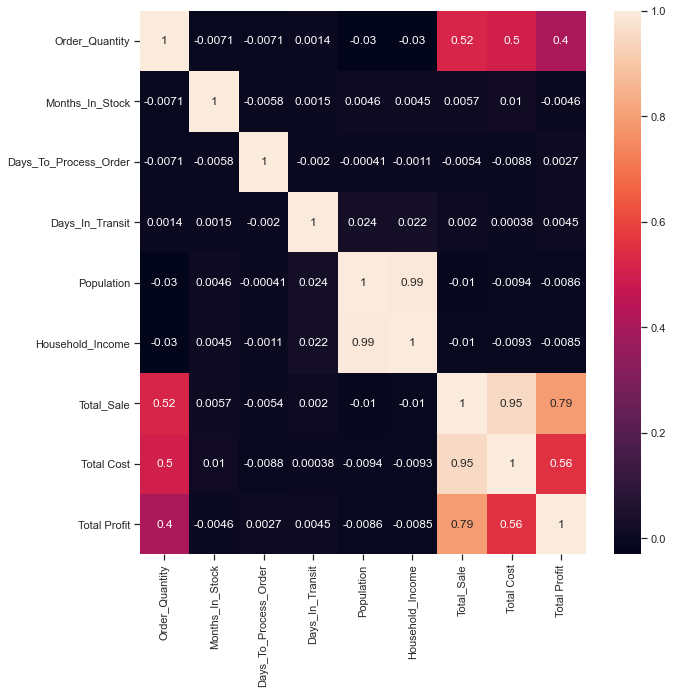

In [57]:
corr2.figure

### Scatterplots:

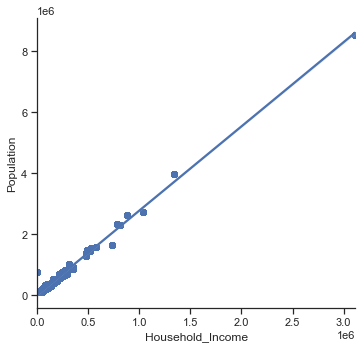

In [21]:
# Create a scatterplot for the "household income" and "population" columns in seaborn

sns.lmplot(x = 'Household_Income', y = 'Population', data = df)

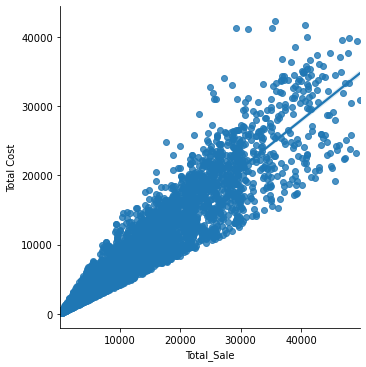

In [58]:
# Create a scatterplot for the "Unit Price" and "Unit Cost" columns in seaborn

sns.lmplot(x = 'Total_Sale', y = 'Total Cost', data = df)

#### Scatterplot Observations
- Household Income and Population have a strong linear correlation with Population. Which makes sense, as a region with higher populations will have more job opportunities with higher paying jobs.
- Total Cost and Total Sale also have an upward trend and while there is a relationship between cost and price, it seems there is a variance between this relationship

### Pair Plots:

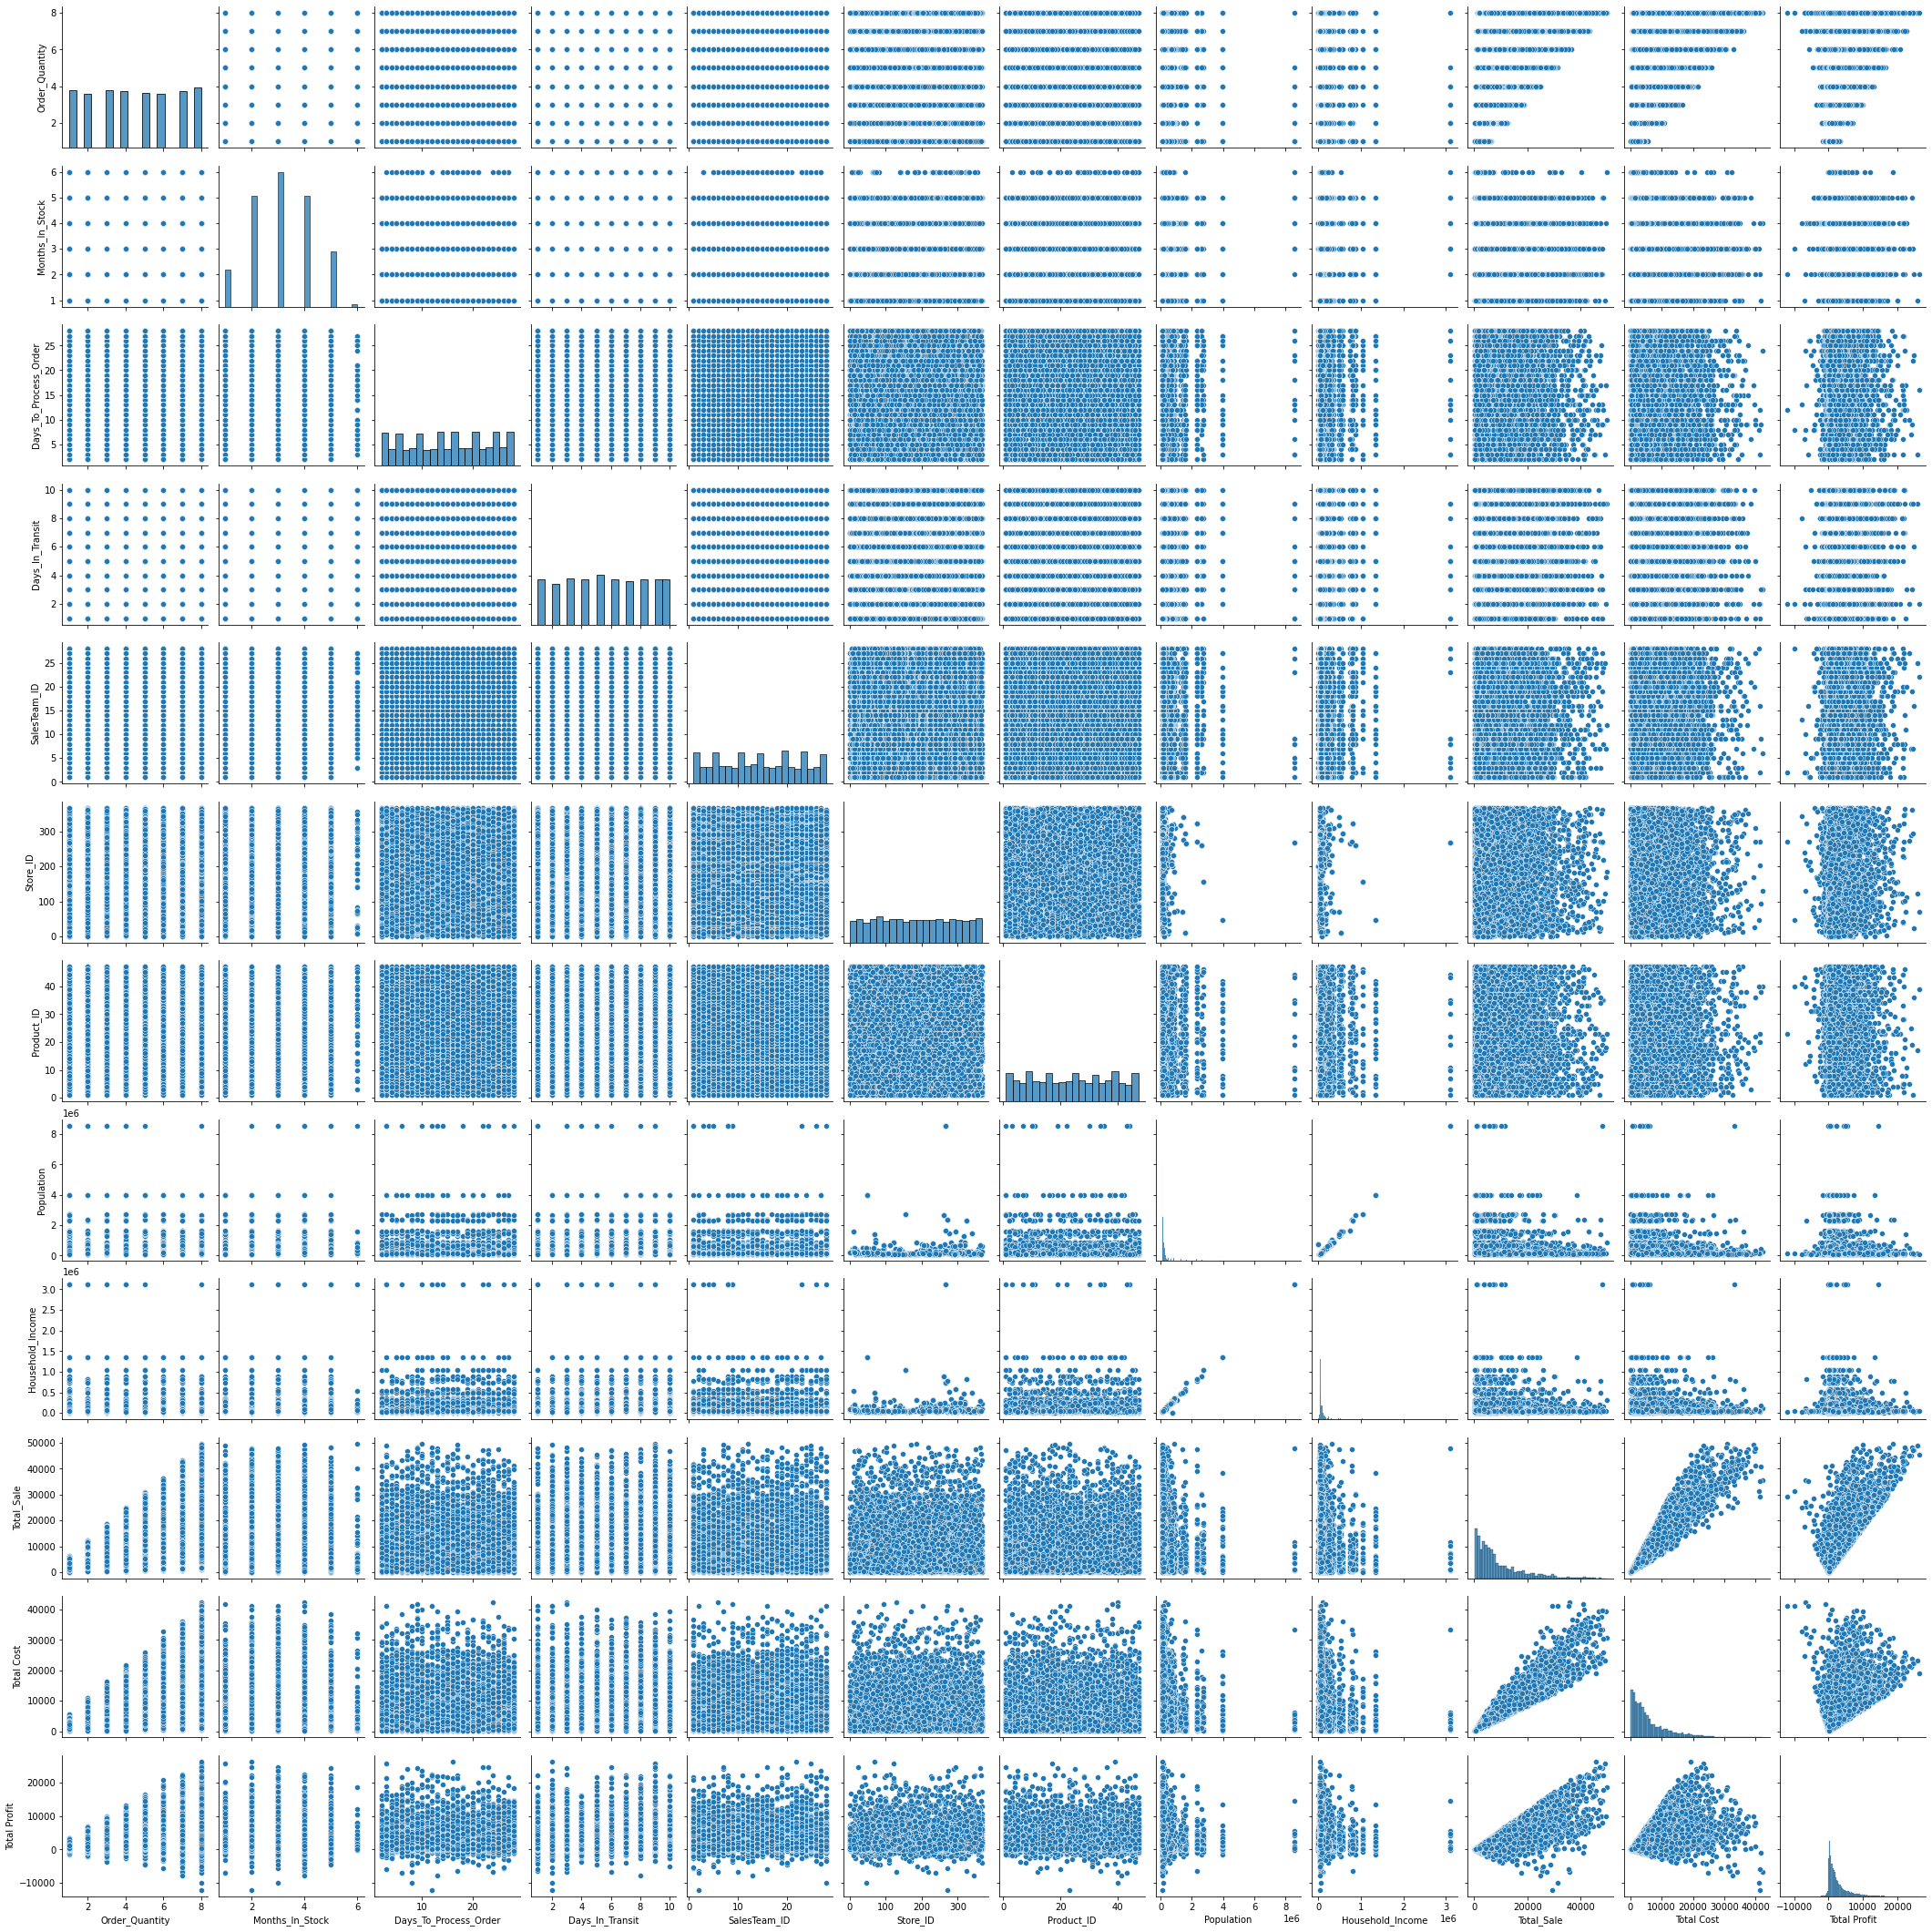

In [59]:
# Create a pair plot 

g = sns.pairplot(sub)

#### Pair Plot Conclusions
- Again, the pair plot indicates that there is a strong correlation between Population and Household Income. This information is good for further analysis to understand the marketplace and sales. 
- There' also a positive correlation between unit cost and unit price, but it would be interesting to see what product cost more with lower profit margins. 
- It looks like Unit Cost is left skewed but unit price is slightly less left-skewed with some prices being on the lower end. 

### Categorical Plots:

##### Creating a categorical variable that splits the "Unit_Cost" column into categories

C:\Users\E054746\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Unit_Price', ylabel='Density'>

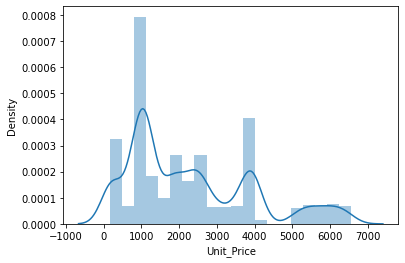

In [40]:
# Use a histogram to visualize the distribution of the variables. 

sns.distplot(df['Unit_Price'], bins = 20)

In [31]:
df.loc[df['Unit_Price'] < 1000.0, 'Price category'] = 'Low price'

In [32]:
df.loc[(df['Unit_Price'] >= 1000.0) & (df['Unit_Price'] < 3000.0), 'Price category'] = 'Mid price'

In [33]:
df.loc[df['Unit_Price'] >= 3000.0, 'Price category'] = 'High price'

In [60]:
df['Price category'].value_counts(dropna = False)

Mid price     3939
High price    2327
Low price     1725
Name: Price category, dtype: int64

In [61]:
df.columns

Index(['Order_Number', 'Sales_Channel', 'Procured_Date', 'Order_Date',
       'Ship_Date', 'Delivery_Date', 'SalesTeam_ID', 'Customer_ID', 'Store_ID',
       'Product_ID', 'Order_Quantity', 'Discount_Applied', 'Unit_Price',
       'Unit_Cost', 'Customer_Names', 'Product_Name', 'City_Name', 'County',
       'State_Code', 'State', 'Type', 'Latitude', 'Longitude', 'Population',
       'Household_Income', 'Median_Income', 'Time_Zone', 'Region',
       'Sales_Team', 'Price category'],
      dtype='object')

##### Creating a categorical variable that splits the "Household_Income" column into categories

C:\Users\E054746\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Household_Income', ylabel='Density'>

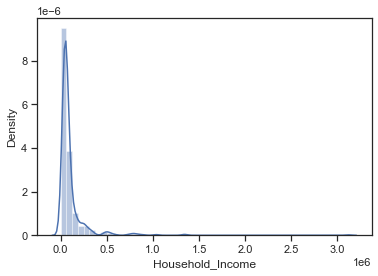

In [20]:
# Use a histogram to visualize the distribution of the variables. 

sns.distplot(df['Household_Income'], bins = 50)

In [62]:
# Look for the max income level to create an income category
df['Household_Income'].max()

3113535

In [63]:
# Look for the min household income level to create an income category
df['Household_Income'].min()

0

In [13]:
df.loc[df['Household_Income'] < 40000, 'HH income category'] = 'Lower income'

In [14]:
df.loc[(df['Household_Income'] >= 40000) & (df['Household_Income'] < 95000), 'HH income category'] = 'Mid income'

In [15]:
df.loc[df['Household_Income'] >= 95000, 'HH income category'] = 'High income'

In [16]:
df['HH income category'].value_counts(dropna = False)

Mid income      4744
High income     1832
Lower income    1415
Name: HH income category, dtype: int64

In [17]:
df.columns

Index(['Order_Number', 'Sales_Channel', 'Warehouse_Code', 'Procured_Date',
       'Order_Date', 'Months_In_Stock', 'Ship_Date', 'Days_To_Process_Order',
       'Delivery_Date', 'Days_In_Transit', 'SalesTeam_ID', 'Customer_ID',
       'Store_ID', 'Product_ID', 'Order_Quantity', 'Discount_Applied',
       'Unit_Price', 'Unit_Cost', 'Discounted_Price_PU', 'Total_Sale',
       'Total Cost', 'Total Profit', 'Customer_Names', 'Product_Name',
       'City_Name', 'County', 'State_Code', 'State', 'Type', 'Latitude',
       'Longitude', 'Population', 'Household_Income', 'Median_Income',
       'Time_Zone', 'Region', 'Sales_Team', 'Sales Range',
       'HH income category'],
      dtype='object')

##### Creating a categorical variable that splits the "Total Sale" column into categories

C:\Users\E054746\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Total_Sale', ylabel='Density'>

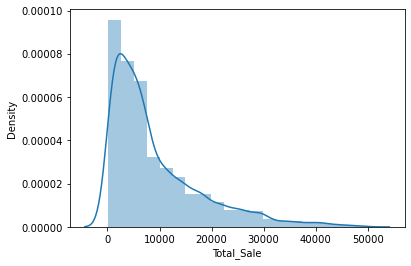

In [31]:
# Use a histogram to visualize the distribution of the variables. 

sns.distplot(df['Total_Sale'], bins = 20)

In [6]:
df.loc[df['Total_Sale'] < 10000, 'Sales Range'] = 'Lower sales'

In [7]:
df.loc[(df['Total_Sale'] >= 10000) & (df['Total_Sale'] < 30000), 'Sales Range'] = 'Mid-Level sales'

In [8]:
df.loc[df['Total_Sale'] >= 30000, 'Sales Range'] = 'High sales'

In [9]:
df['Sales Range'].value_counts(dropna = False)

Lower sales        5393
Mid-Level sales    2306
High sales          292
Name: Sales Range, dtype: int64

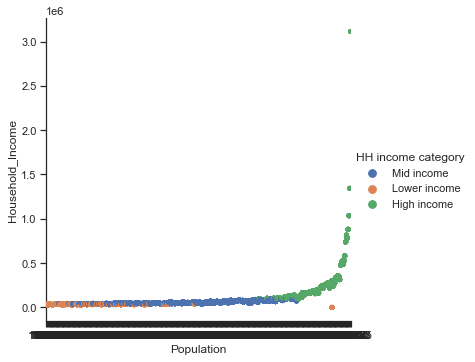

In [70]:
# Create a categorical plot in seaborn using the hh income categories created above

sns.set(style="ticks")
income_cat = sns.catplot(x='Population', y='Household_Income', hue='HH income category', data=df)

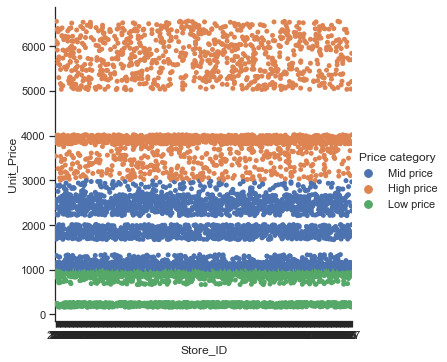

In [71]:
# Create a categorical plot in seaborn using the hh income categories created above

sns.set(style="ticks")
store_cat = sns.catplot(x='Store_ID', y='Unit_Price', hue='Price category', data=df)

Not much can be inferred with this chart.

#### Categorical Plot Reflection
- The chart above slightly confirms that the larger the population, the higher the income.

C:\Users\E054746\Anaconda3\lib\site-packages\seaborn\categorical.py:3714: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\Users\E054746\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


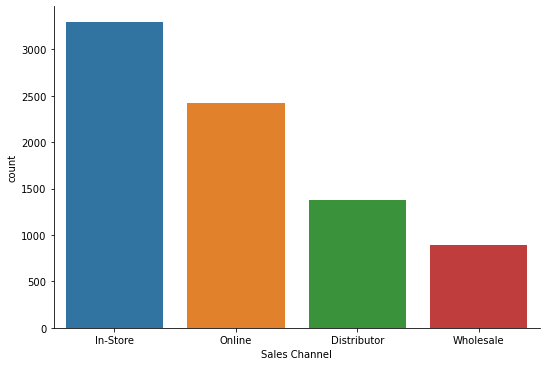

In [11]:
# plot the count of products sold by sales channel
fg = sns.factorplot('Sales_Channel', data=df, kind='count', aspect=1.5)
fg.set_xlabels('Sales Channel')

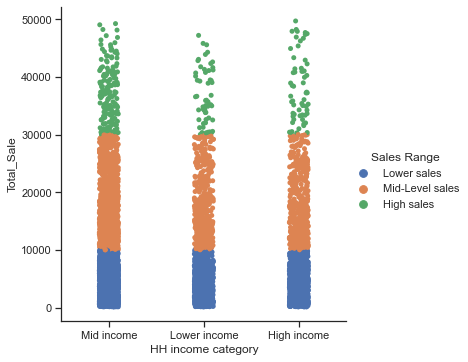

In [24]:
# Create a categorical plot in seaborn using the hh income categories created above

sns.set(style="ticks")
sale_cat = sns.catplot(x='HH income category', y='Total_Sale', hue='Sales Range', data=df)

##### The above categorical plot shows that those households who are in the mid income (40-95k) range are spending more. 

C:\Users\E054746\Anaconda3\lib\site-packages\seaborn\categorical.py:3714: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\Users\E054746\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


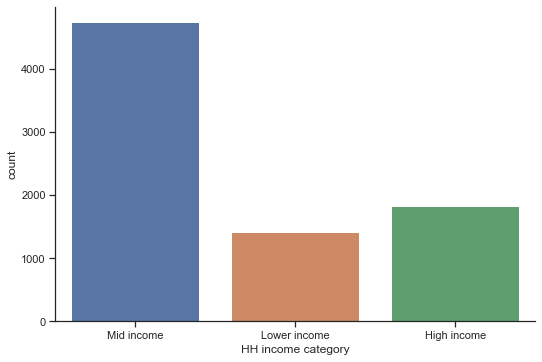

In [23]:
# plot the number of household income categories
sns.factorplot('HH income category', data=df, kind='count', aspect=1.5)

##### There are significantly more people who are in the mid-income level range (40-95k).

C:\Users\E054746\Anaconda3\lib\site-packages\seaborn\categorical.py:3714: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\Users\E054746\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


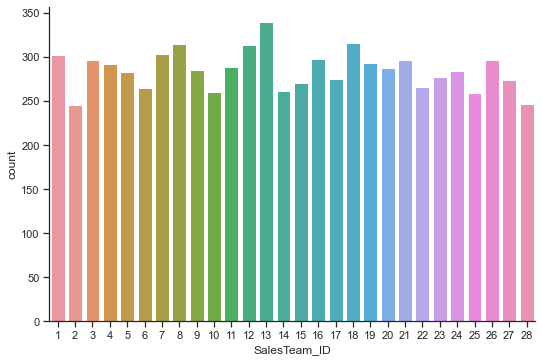

In [26]:
# plot the number of household income categories
sns.factorplot('SalesTeam_ID', data=df, kind='count', aspect=1.5)

C:\Users\E054746\Anaconda3\lib\site-packages\seaborn\categorical.py:3714: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\Users\E054746\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


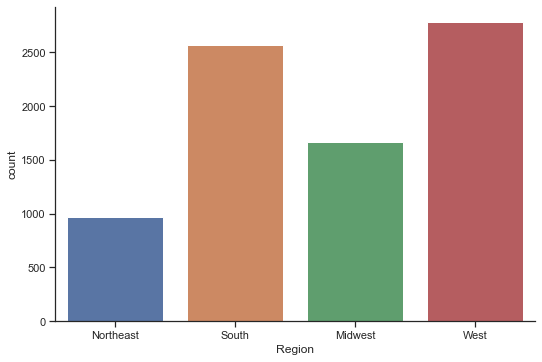

In [28]:
# plot the number of household income categories
sns.factorplot('Region', data=df, kind='count', aspect=1.5)

In [29]:
# Number of household income category in each region
df.groupby(['HH income category', 'Region'])['HH income category'].count()

HH income category  Region   
High income         Midwest       364
                    Northeast     320
                    South         638
                    West          510
Lower income        Midwest       179
                    Northeast     121
                    South         463
                    West          652
Mid income          Midwest      1122
                    Northeast     529
                    South        1471
                    West         1622
Name: HH income category, dtype: int64

C:\Users\E054746\Anaconda3\lib\site-packages\seaborn\categorical.py:3714: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\Users\E054746\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


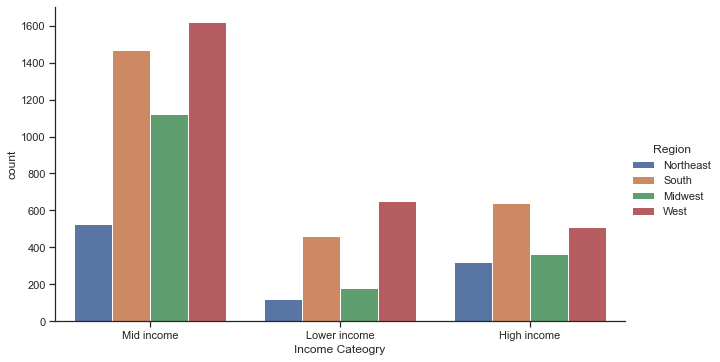

In [30]:
# Using seaborn to group by HH income category and region
g = sns.factorplot('HH income category', data=df, hue='Region', kind='count', aspect=1.75)
g.set_xlabels('Income Cateogry')

C:\Users\E054746\Anaconda3\lib\site-packages\seaborn\categorical.py:3714: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\Users\E054746\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


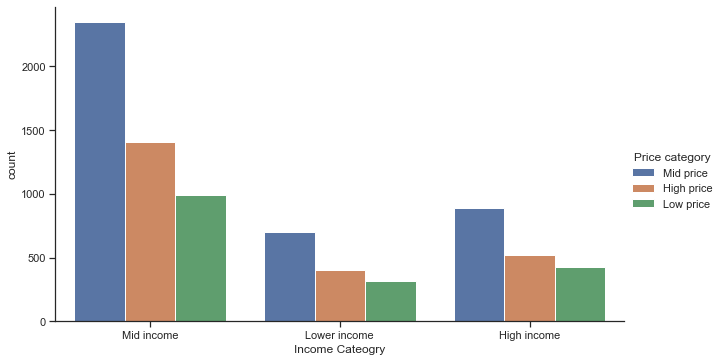

In [34]:
# Using seaborn to group by HH income category and region
hg = sns.factorplot('HH income category', data=df, hue='Price category', kind='count', aspect=1.75)
hg.set_xlabels('Income Cateogry')

In [52]:
# Number of orders by Sales Team
df.groupby(['Region', 'Sales_Team'])['Region'].count()

Region   Sales_Team    
Midwest  Adam Hernandez     55
         Anthony Berry      65
         Anthony Torres     57
         Carl Nguyen        70
         Carlos Miller      40
                          ... 
West     Shawn Cook        104
         Shawn Torres       89
         Shawn Wallace     134
         Stephen Payne      95
         Todd Roberts      125
Name: Region, Length: 112, dtype: int64

#### It continues to look like mid-price products are sold more in all household categories.

### Question 7 - Revisit the questions you generated in the previous task and write answers to those you can based on the exploration you’ve conducted so far. Add any new questions that may have arisen based on the early findings in your visual exploration.

#### 1.	What region brought the most sales?
       - At first glance, the West region is brining in most of the sales. 
#### 2.	What sales representative was the highest performer? Who was the lowest?
       - Todd Roberts (Sales ID 13 is the top sales person). Todd is the second best sales performer in the West. 
#### 3.	Who where the top customers? 
       - Top customers are those who are in the West Region and their household income range is mid-level ($40-95k)
#### 4.	What sales channel was the most effective?
       - In-Store is the top performing channel
#### 5.	Does household income have an influence on sales? 
        - This is one variable that will be worth exploring and can be used as one hypothesis. 
#### 6.	What are the sales trend over the years?
        - I believe the sales trend in the West will continue to grow. 

### Question 8 Define any hypotheses that you can at this point. You’ll be testing these later on.
#### Based on the initial analysis above, I derived to a couple of hypothesis
- Stores located in an area where income levels are mid-level ($40-95k), will be most succesful.
- The more stores in highly populated areas, the more profitable they will be. 
